In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import functions as fun
from math import radians, cos, sin, asin, sqrt

# Load the data file and display the first five rows
data_path = 'GLT_ByMajorCity.csv'
data = fun.load_data(data_path)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [2]:
# Convert the 'dt' column to the datetime type
data = fun.clean_and_transform_data(data)
data.dtypes  # Check the data types

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int32
dtype: object

In [3]:
# Transform the 'Latitude' and 'Longitude' columns using the 'fun.convert_coordinates' function
data = fun.transform_coordinates(data)

data.head()  # Display the results


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [4]:
# Clean and transform the data
data = fun.clean_and_transform_data(data)

# Save the cleaned and processed data set as 'MajorCities.csv'
cleaned_data_path = 'MajorCities.csv'
data.to_csv(cleaned_data_path, index=False)

# Path to the saved file
cleaned_data_path

'MajorCities.csv'

In [5]:
# Load the processed data file and inspect its contents
cleaned_data = pd.read_csv('MajorCities.csv')

# Display the first five rows
cleaned_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [6]:
# Calculate yearly maximum and minimum temperatures for each city
city_yearly_temps = fun.calculate_city_yearly_temperature_ranges(cleaned_data)

# Find the largest temperature ranges for each city and select the top 10 cities
top_cities_with_ranges = fun.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities_with_ranges


,City,Year,max,min,temp_range
34,Harbin,1922,23.148,-26.772,49.920
19,Changchun,1919,26.572,-20.179,46.751
64,Montreal,1761,26.164,-15.568,41.732
85,Shenyang,1922,23.925,-17.035,40.960
65,Moscow,2010,24.580,-15.846,40.426
48,Kiev,1929,22.543,-16.191,38.734
96,Toronto,1761,25.649,-11.312,36.961
92,Taiyuan,1930,23.833,-13.116,36.949
79,Saint Petersburg,1871,17.592,-18.644,36.236
71,New York,1761,29.141,-6.900,36.041


In [7]:
# Filter data for the years between 1920 and 1970 and find the top cities
city_yearly_temps_period = fun.filter_data_by_year_range(city_yearly_temps, 1920, 1970)
top_cities_with_ranges_period = fun.find_top_cities_with_temp_ranges(city_yearly_temps_period)

top_cities_with_ranges_period


,City,Year,max,min,temp_range
34,Harbin,1922,23.148,-26.772,49.920
19,Changchun,1922,23.445,-23.272,46.717
85,Shenyang,1922,23.925,-17.035,40.960
48,Kiev,1929,22.543,-16.191,38.734
65,Moscow,1956,19.467,-18.943,38.410
64,Montreal,1934,20.073,-17.961,38.034
92,Taiyuan,1930,23.833,-13.116,36.949
96,Toronto,1934,20.057,-15.502,35.559
94,Tianjin,1922,27.222,-7.931,35.153
73,Peking,1922,27.222,-7.931,35.153


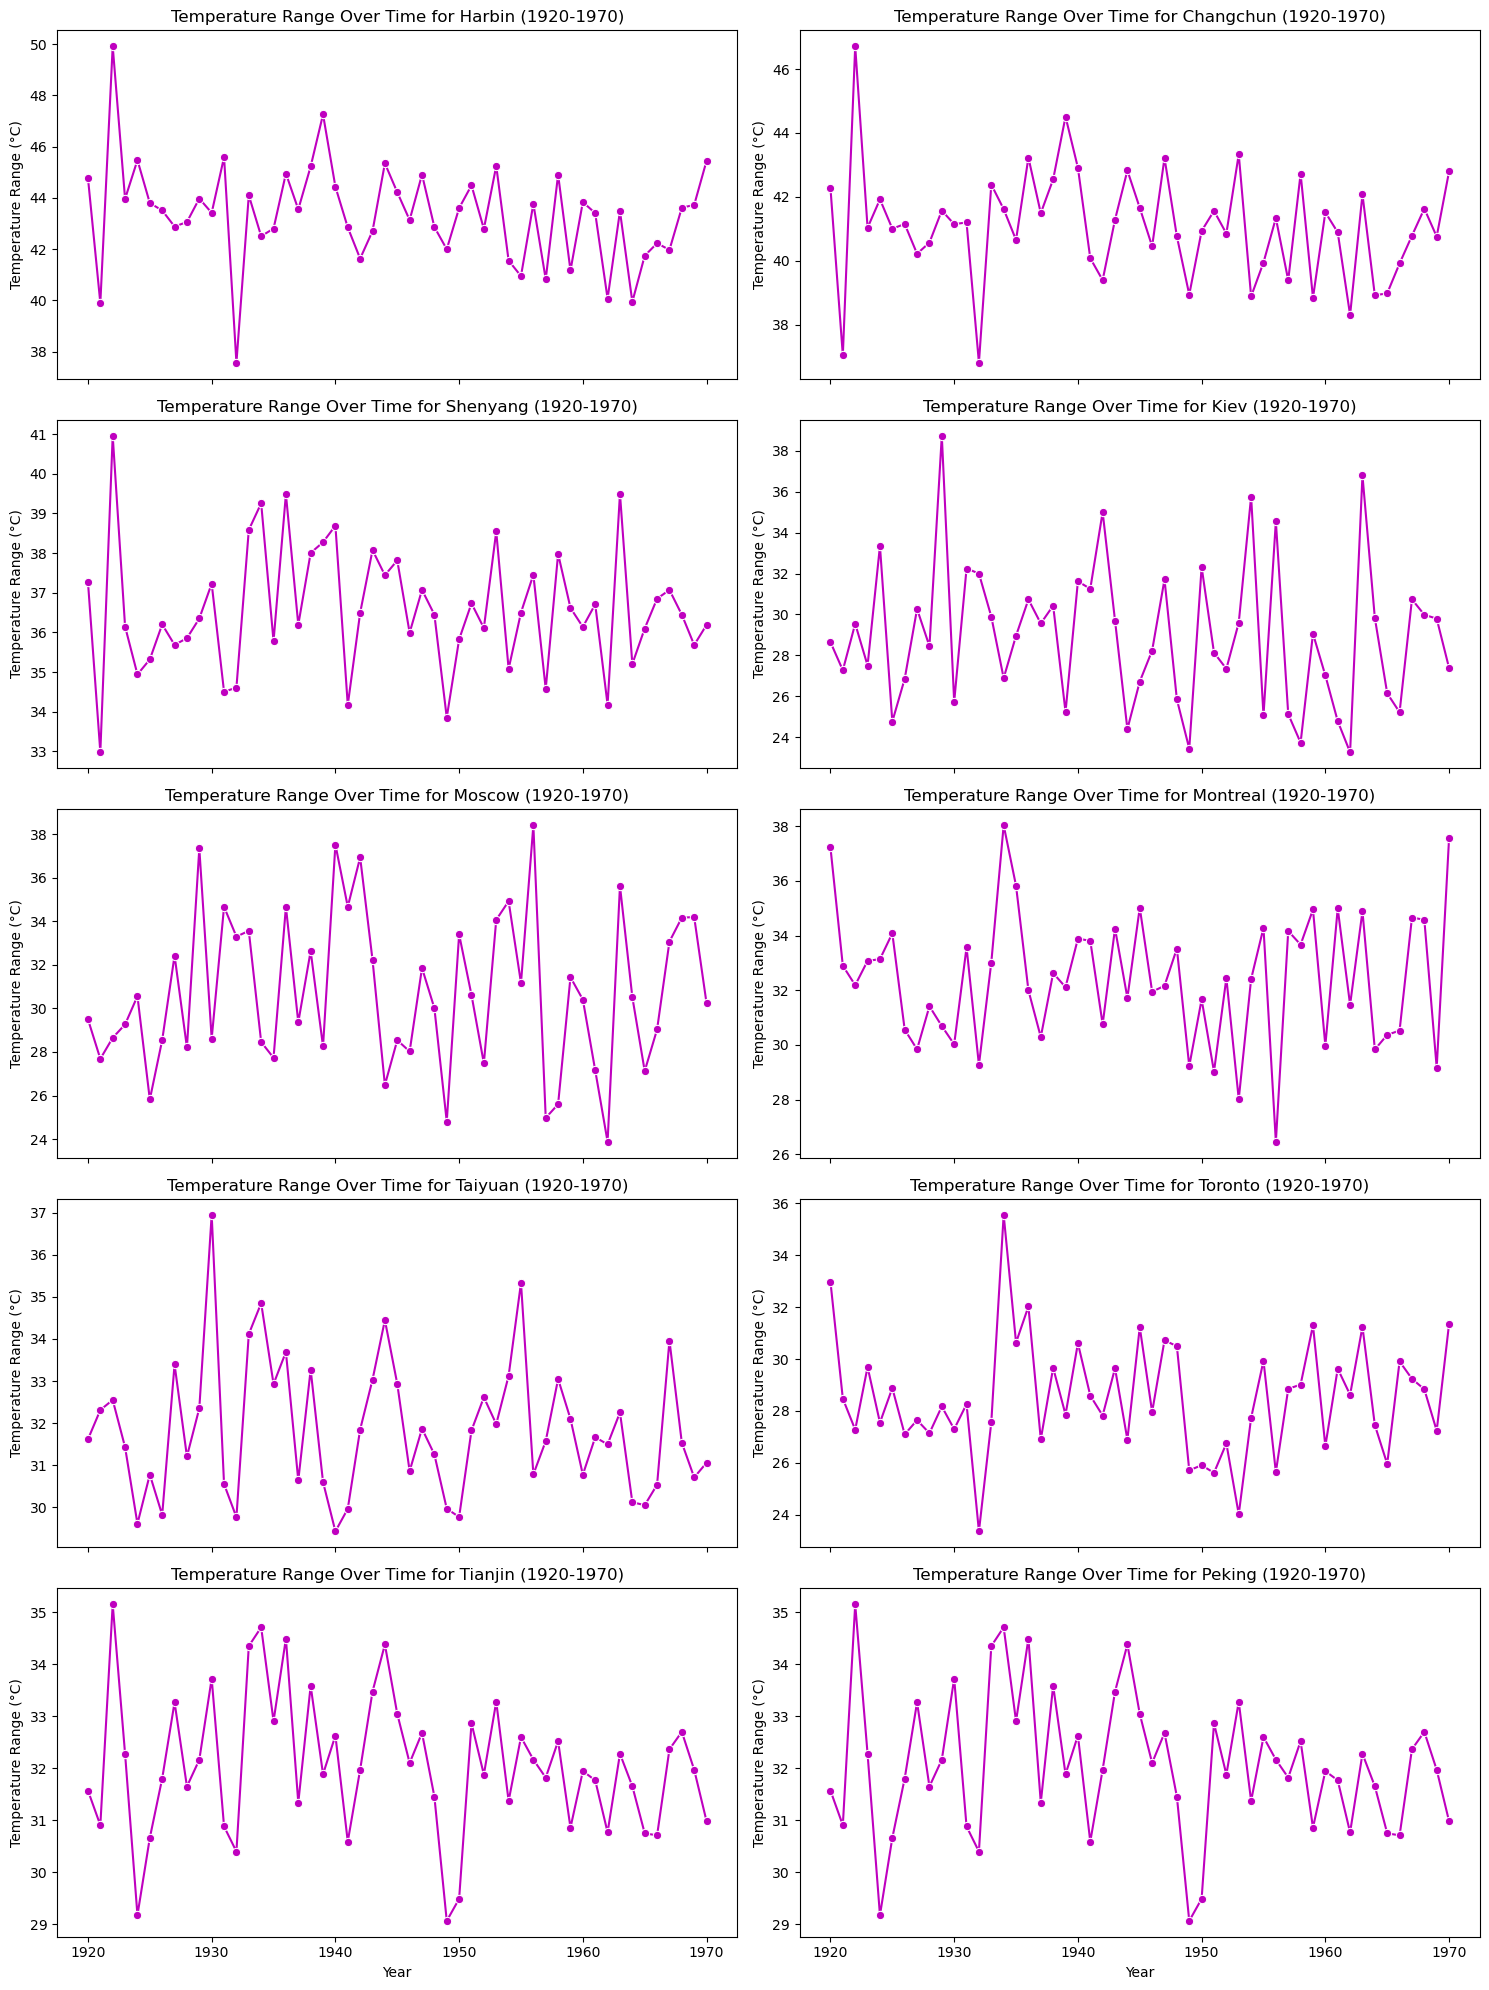

/Users/cihanelv/Documents/GitHub/dscoding-projects/cihan.elveren/Weather_Project/functions.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


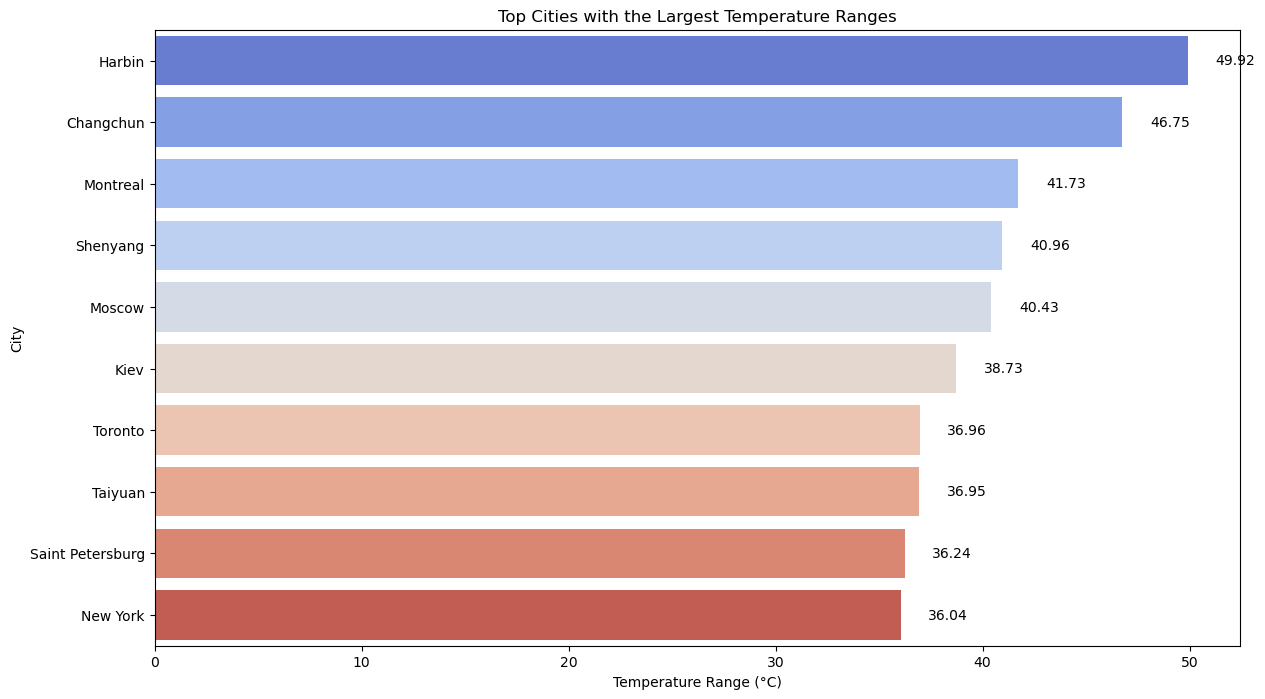

In [8]:
# Merge top cities with geographical data and plot the temperature range
top_cities_geo = fun.merge_with_geographical_data(cleaned_data, top_cities_with_ranges)
fun.plot_temperature_range(city_data=city_yearly_temps_period, 
                           top_cities=top_cities_with_ranges_period['City'], 
                           start_year=1920, 
                           end_year=1970)

# Plot a bar graph for the temperature range
fun.plot_temperature_range_bar(city_data=top_cities_with_ranges, top_cities=top_cities_with_ranges['City'])


In [9]:
# Display the first few rows of the dataframe to understand its structure
cleaned_data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [10]:
# Filter the data for the years between 1920 and 1970
filtered_data = fun.filter_data_by_year_range(cleaned_data, 1920, 1970)

# Calculate yearly temperature ranges and find the top cities
city_yearly_temps = fun.calculate_city_yearly_temperature_ranges(filtered_data)
top_cities = fun.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities


,City,Year,max,min,temp_range
34,Harbin,1922,23.148,-26.772,49.920
19,Changchun,1922,23.445,-23.272,46.717
85,Shenyang,1922,23.925,-17.035,40.960
48,Kiev,1929,22.543,-16.191,38.734
65,Moscow,1956,19.467,-18.943,38.410
64,Montreal,1934,20.073,-17.961,38.034
92,Taiyuan,1930,23.833,-13.116,36.949
96,Toronto,1934,20.057,-15.502,35.559
94,Tianjin,1922,27.222,-7.931,35.153
73,Peking,1922,27.222,-7.931,35.153


/Users/cihanelv/Documents/GitHub/dscoding-projects/cihan.elveren/Weather_Project/functions.py:225: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


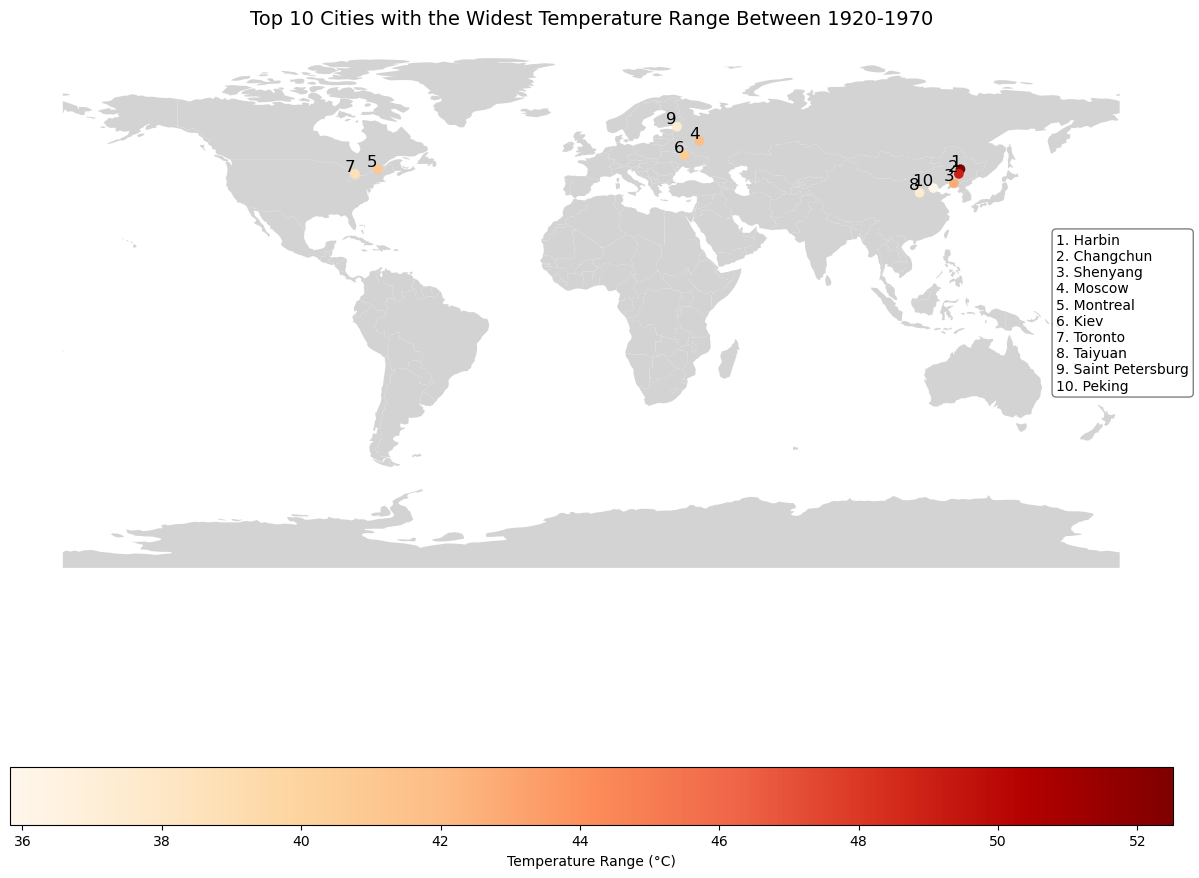

In [11]:
# Fonksiyonu kullanarak haritayı çizin
fun.plot_temperature_range_map('MajorCities.csv', 1920, 1970, top_n=10)

In [12]:
# Load the CSV file
cities_df = fun.load_data('MajorCities.csv')

# Extract the 'Year' from the 'dt' column
cities_df['Year'] = pd.to_datetime(cities_df['dt']).dt.year

# Filter the data for the years between 1920 and 1970
filtered_cities_df = fun.filter_data_by_year_range(cities_df, 1920, 1970)

# Calculate the yearly average temperature for each city
yearly_avg_temps = (
    filtered_cities_df.groupby(['City', 'Country', 'Latitude', 'Longitude', 'Year'])['AverageTemperature']
    .mean()
    .reset_index()
)

# Display the first five rows of the result
print(yearly_avg_temps.head())


      City        Country  Latitude  Longitude  Year  AverageTemperature
0  Abidjan  Côte D'Ivoire      5.63      -3.23  1920           26.324167
1  Abidjan  Côte D'Ivoire      5.63      -3.23  1921           26.420250
2  Abidjan  Côte D'Ivoire      5.63      -3.23  1922           26.229167
3  Abidjan  Côte D'Ivoire      5.63      -3.23  1923           25.962167
4  Abidjan  Côte D'Ivoire      5.63      -3.23  1924           26.092167


In [13]:
# "Peking" ve "Los Angeles" şehirlerinin koordinatlarını bulalım
peking_coords = cleaned_data[cleaned_data['City'] == 'Peking'].iloc[0]
los_angeles_coords = cleaned_data[cleaned_data['City'] == 'Los Angeles'].iloc[0]


peking_coords, los_angeles_coords

(dt                               1820-08-01
 AverageTemperature                   22.822
 AverageTemperatureUncertainty         2.218
 City                                 Peking
 Country                               China
 Latitude                              39.38
 Longitude                            116.53
 Year                                   1820
 Name: 167116, dtype: object,
 dt                                  1849-01-01
 AverageTemperature                       8.819
 AverageTemperatureUncertainty            2.558
 City                               Los Angeles
 Country                          United States
 Latitude                                 34.56
 Longitude                               -118.7
 Year                                      1849
 Name: 124389, dtype: object)

In [14]:

# Her şehir için yıllık ortalama sıcaklıkların genel ortalamasını hesaplayalım
city_avg_temps = yearly_avg_temps.groupby(['City', 'Country', 'Latitude', 'Longitude'])['AverageTemperature'].mean().reset_index()

# Artık her şehir için sadece bir kayıt içeren yeni veri setini kullanarak Pekin'e en yakın şehirleri bulalım
nearest_to_peking = fun.find_nearest_cities(peking_coords, city_avg_temps)
print(nearest_to_peking)


        City Country  Latitude  Longitude  AverageTemperature
73    Peking   China     39.38     116.53           11.915804
93  Tangshan   China     37.78     113.90           11.728559
24    Dalian   China     39.38     120.69           10.246918


In [15]:
route = fun.suggest_route(peking_coords, los_angeles_coords, city_avg_temps)

# Rota çıktısını yazdıra
print(route)


['Peking', 'Jinan', 'Tianjin', 'Dalian', 'Tangshan', 'Wuhan', 'Guangzhou', 'Taipei', 'Manila', 'Chongqing', 'Nanjing', 'Xian', 'Shanghai', 'Taiyuan', 'Seoul', 'Nagoya', 'Shenyang', 'Tokyo', 'Ho Chi Minh City', 'Rangoon', 'Madras', 'Hyderabad', 'Bombay', 'Ahmadabad', 'Karachi', 'Jaipur', 'Delhi', 'Kanpur', 'Calcutta', 'Nagpur', 'New Delhi', 'Surat', 'Lakhnau', 'Dhaka', 'Bangalore', 'Bangkok', 'Surabaya', 'Singapore', 'Pune', 'Faisalabad', 'Baghdad', 'Riyadh', 'Cairo', 'Alexandria', 'Aleppo', 'Gizeh', 'Jiddah', 'Izmir', 'Rome', 'Istanbul', 'Berlin', 'London', 'Madrid', 'Paris', 'Kiev', 'Mashhad', 'Lahore', 'Chengdu', 'Jakarta', 'Sydney', 'Durban', 'Dar Es Salaam', 'Mogadishu', 'Umm Durman', 'Kano', 'Lagos', 'Abidjan', 'Dakar', 'Fortaleza', 'Rio De Janeiro', 'Salvador', 'Brasília', 'São Paulo', 'Bogotá', 'Santo Domingo', 'New York', 'Mexico', 'Cali', 'Belo Horizonte', 'Ibadan', 'Luanda', 'Harare', 'Kinshasa', 'Addis Abeba', 'Cape Town', 'Casablanca', 'Montreal', 'Los Angeles']
